<a href="https://colab.research.google.com/github/Ana-AlonsoCanizares/Practicas_Individuales/blob/main/PI_parking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importación de librerías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from numpy.core.function_base import linspace
from math import floor
from math import ceil
from numpy.ma.core import size

# Lectura de la base de datos
filename = 'ocupacion_parking.csv'
data = pd.read_csv(filename, sep = ',')


data['Mes'] = data.apply(lambda _: '', axis=1)

data = data.astype({'Fecha':'str'})

data['Mes'] = data['Fecha'].str[3:5]

data = data.dropna()
# Revisión de los datos
print(data.shape)
data.head(10)

(265, 13)


,Fecha,Dia,Horario,parking_0,parking_1,parking_2,parking_3,parking_4,parking_5,parking_6,parking_7,parking_subterraneo,Mes
0,12-09-22,L,9,0.0,100.0,100.0,100.0,60.0,50.0,90.0,50.0,0,09
1,12-09-22,L,9:30,0.0,100.0,100.0,100.0,60.0,50.0,90.0,50.0,0,09
2,12-09-22,L,10,0.0,100.0,100.0,100.0,60.0,50.0,90.0,50.0,0,09
3,12-09-22,L,14:00,0.0,80.0,80.0,80.0,50.0,50.0,90.0,50.0,0,09
4,12-09-22,L,15:00,0.0,50.0,50.0,50.0,50.0,50.0,80.0,50.0,0,09
5,12-09-22,L,16:00,0.0,50.0,50.0,50.0,50.0,50.0,80.0,50.0,0,09
6,13-09-22,M,9,0.0,90.0,80.0,50.0,50.0,90.0,90.0,80.0,0,09
7,13-09-22,M,9:30,0.0,100.0,100.0,100.0,70.0,90.0,90.0,100.0,0,09
8,13-09-22,M,10,20.0,100.0,100.0,100.0,95.0,100.0,90.0,100.0,0,09
9,13-09-22,M,14:00,50.0,100.0,100.0,100.0,90.0,90.0,90.0,100.0,0,09


In [2]:
data.loc[data['Horario'] == '9', 'Horario'] = '9:00'
data.loc[data['Horario'] == '10', 'Horario'] = '10:00'
data

,Fecha,Dia,Horario,parking_0,parking_1,parking_2,parking_3,parking_4,parking_5,parking_6,parking_7,parking_subterraneo,Mes
0,12-09-22,L,9:00,0.0,100.0,100.0,100.0,60.0,50.0,90.0,50.0,0,09
1,12-09-22,L,9:30,0.0,100.0,100.0,100.0,60.0,50.0,90.0,50.0,0,09
2,12-09-22,L,10:00,0.0,100.0,100.0,100.0,60.0,50.0,90.0,50.0,0,09
3,12-09-22,L,14:00,0.0,80.0,80.0,80.0,50.0,50.0,90.0,50.0,0,09
4,12-09-22,L,15:00,0.0,50.0,50.0,50.0,50.0,50.0,80.0,50.0,0,09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,10-02-23,V,9:30,10.0,100.0,90.0,70.0,60.0,60.0,100.0,100.0,0,02
326,10-02-23,V,10:00,30.0,100.0,100.0,90.0,80.0,80.0,100.0,100.0,20,02
327,10-02-23,V,14:00,20.0,80.0,80.0,70.0,50.0,60.0,90.0,80.0,30,02
328,10-02-23,V,15:00,10.0,80.0,60.0,30.0,40.0,50.0,90.0,50.0,20,02


In [3]:
conditions = [
    (data['Dia'] == 'L'),
    (data['Dia'] == 'M'),
    (data['Dia'] == 'X'),
    (data['Dia'] == 'J'),
    (data['Dia'] == 'V')
]

#define results
results = [1,2,3,4,5]

#create new column based on conditions in column1 and column2
data['dia_num'] = np.select(conditions, results)

data.dtypes

Fecha                   object
Dia                     object
Horario                 object
parking_0              float64
parking_1              float64
parking_2              float64
parking_3              float64
parking_4              float64
parking_5              float64
parking_6              float64
parking_7              float64
parking_subterraneo      int64
Mes                     object
dia_num                  int64
dtype: object

In [4]:
df_ocupacion_d_h = data.groupby(['Dia', 'Horario']).mean().reset_index()
print(df_ocupacion_d_h)

   Dia Horario  parking_0   parking_1   parking_2   parking_3  parking_4  \
0    J   10:00  52.000000  100.000000  100.000000   98.000000  98.000000   
1    J   14:00  56.666667   96.666667   95.555556   95.555556  91.111111   
2    J   15:00  61.111111   94.444444   88.888889   84.444444  78.888889   
3    J   16:00  67.000000   98.000000   96.000000   92.000000  90.000000   
4    J    9:00   9.444444   97.777778   92.222222   63.333333  68.888889   
5    J    9:30  22.222222  100.000000  100.000000   78.888889  85.555556   
6    L   10:00  52.272727  100.000000  100.000000   95.454545  93.636364   
7    L   14:00  52.000000   96.000000   90.000000   90.000000  84.000000   
8    L   15:00  46.000000   88.000000   80.000000   76.000000  76.000000   
9    L   16:00  57.272727   91.818182   89.545455   84.545455  86.363636   
10   L    9:00  14.500000   87.000000   77.000000   46.000000  62.000000   
11   L    9:30  35.000000   95.000000   92.000000   73.000000  80.000000   
12   M   10:

<ipython-input-4-e30d9984b463>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ocupacion_d_h = data.groupby(['Dia', 'Horario']).mean().reset_index()


In [5]:
df_ocupacion_m_d = data.groupby(['Mes', 'Dia']).mean().reset_index()
print(df_ocupacion_m_d)

   Mes Dia  parking_0   parking_1  parking_2  parking_3  parking_4  parking_5  \
0   01   L  58.333333   93.333333  88.333333  86.666667  80.000000  76.666667   
1   01   M  50.000000   96.666667  95.000000  91.666667  91.666667  81.666667   
2   02   J  32.083333   95.000000  92.500000  84.166667  81.666667  77.500000   
3   02   L  43.333333   95.000000  83.333333  80.000000  76.666667  70.000000   
4   02   M  33.333333   98.333333  93.333333  78.333333  78.333333  78.333333   
5   02   V  13.333333   89.166667  79.166667  66.666667  57.500000  55.833333   
6   02   X  30.000000   93.333333  91.666667  74.166667  74.166667  71.666667   
7   09   J  32.142857   97.142857  92.857143  86.428571  83.571429  91.428571   
8   09   L  16.071429   90.714286  87.500000  85.000000  76.428571  73.571429   
9   09   M  27.142857   96.428571  95.714286  89.285714  84.642857  91.428571   
10  09   V  13.571429   94.285714  82.142857  53.928571  71.428571  76.428571   
11  09   X  26.250000   97.5

<ipython-input-5-7b0e03a85a78>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ocupacion_m_d = data.groupby(['Mes', 'Dia']).mean().reset_index()


In [6]:
df_ocupacion_d = data.groupby(['dia_num']).mean().reset_index()
print(df_ocupacion_d)

   dia_num  parking_0  parking_1  parking_2  parking_3  parking_4  parking_5  \
0        1  43.225806  93.064516  88.306452  77.903226  80.645161  81.129032   
1        2  42.358491  98.113208  95.094340  81.886792  86.132075  89.622642   
2        3  40.000000  96.315789  94.736842  80.526316  79.210526  77.368421   
3        4  45.267857  97.857143  95.535714  85.714286  85.714286  88.035714   
4        5  18.392857  93.214286  83.571429  56.071429  64.107143  71.071429   

   parking_6  parking_7  parking_subterraneo  
0  95.000000  84.677419             4.193548  
1  97.169811  93.584906             5.471698  
2  96.842105  84.210526             7.631579  
3  97.142857  92.678571             4.464286  
4  96.428571  83.035714             3.214286  


<ipython-input-6-103bc44964a9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ocupacion_d = data.groupby(['dia_num']).mean().reset_index()


In [7]:
data.head(29)

,Fecha,Dia,Horario,parking_0,parking_1,parking_2,parking_3,parking_4,parking_5,parking_6,parking_7,parking_subterraneo,Mes,dia_num
0,12-09-22,L,9:00,0.0,100.0,100.0,100.0,60.0,50.0,90.0,50.0,0,09,1
1,12-09-22,L,9:30,0.0,100.0,100.0,100.0,60.0,50.0,90.0,50.0,0,09,1
2,12-09-22,L,10:00,0.0,100.0,100.0,100.0,60.0,50.0,90.0,50.0,0,09,1
3,12-09-22,L,14:00,0.0,80.0,80.0,80.0,50.0,50.0,90.0,50.0,0,09,1
4,12-09-22,L,15:00,0.0,50.0,50.0,50.0,50.0,50.0,80.0,50.0,0,09,1
5,12-09-22,L,16:00,0.0,50.0,50.0,50.0,50.0,50.0,80.0,50.0,0,09,1
6,13-09-22,M,9:00,0.0,90.0,80.0,50.0,50.0,90.0,90.0,80.0,0,09,2
7,13-09-22,M,9:30,0.0,100.0,100.0,100.0,70.0,90.0,90.0,100.0,0,09,2
8,13-09-22,M,10:00,20.0,100.0,100.0,100.0,95.0,100.0,90.0,100.0,0,09,2
9,13-09-22,M,14:00,50.0,100.0,100.0,100.0,90.0,90.0,90.0,100.0,0,09,2


In [8]:
lunes = df_ocupacion_d_h[df_ocupacion_d_h['Dia'] == 'L']

nueva_fila = {'Dia': 'L',	'Horario': '8:00',	'parking_0': 0, 'parking_1':	0, 'parking_2': 0, 'parking_3':	0, 'parking_4':	6.000000, 'parking_5':	0, 'parking_6':	0, 'parking_7':	0, 'parking_subterraneo':	0.000000, 'dia_num':	1.0}
lunes = lunes.append(nueva_fila, ignore_index=True)

nueva_fila = {'Dia': 'L',	'Horario': '18:00',	'parking_0': 46.5, 'parking_1':		83.818182, 'parking_2':	82.342211, 'parking_3':	78.5, 'parking_4':	89.5, 'parking_5':	83.272727, 'parking_6':	90.454545, 'parking_7':	87.518321, 'parking_subterraneo':	5.617313, 'dia_num':	1.0}
lunes = lunes.append(nueva_fila, ignore_index=True)

nueva_fila = {'Dia': 'L',	'Horario': '22:00',	'parking_0': 5.4, 'parking_1':	1.23134, 'parking_2':	1.784231, 'parking_3':	2.125554, 'parking_4':	7.115622, 'parking_5':	6.235214, 'parking_6':	2.63952, 'parking_7':	1.884914, 'parking_subterraneo':	0.0014, 'dia_num':	1.0}
lunes = lunes.append(nueva_fila, ignore_index=True)


conditions = [
    (lunes['Horario'] == '8:00'),
    (lunes['Horario'] == '9:00'),
    (lunes['Horario'] == '9:30'),
    (lunes['Horario'] == '10:00'),
    (lunes['Horario'] == '14:00'),
    (lunes['Horario'] == '15:00'),
    (lunes['Horario'] == '16:00'),
    (lunes['Horario'] == '18:00'),
    (lunes['Horario'] == '22:00')
]

#define results
results = [1,2,3,4,5,6,7,8,9]

#create new column based on conditions in column1 and column2
lunes['hora_num'] = np.select(conditions, results)

lunes = lunes.sort_values(by = 'hora_num')
lunes

<ipython-input-8-3f2094696b22>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lunes = lunes.append(nueva_fila, ignore_index=True)
<ipython-input-8-3f2094696b22>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lunes = lunes.append(nueva_fila, ignore_index=True)
<ipython-input-8-3f2094696b22>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lunes = lunes.append(nueva_fila, ignore_index=True)


,Dia,Horario,parking_0,parking_1,parking_2,parking_3,parking_4,parking_5,parking_6,parking_7,parking_subterraneo,dia_num,hora_num
6,L,8:00,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.0,1
4,L,9:00,14.500000,87.000000,77.000000,46.000000,62.000000,67.000000,92.000000,69.000000,0.000000,1.0,2
5,L,9:30,35.000000,95.000000,92.000000,73.000000,80.000000,79.000000,96.000000,85.000000,0.000000,1.0,3
0,L,10:00,52.272727,100.000000,100.000000,95.454545,93.636364,89.090909,96.363636,93.636364,2.727273,1.0,4
1,L,14:00,52.000000,96.000000,90.000000,90.000000,84.000000,84.000000,95.000000,85.000000,8.000000,1.0,5
2,L,15:00,46.000000,88.000000,80.000000,76.000000,76.000000,79.000000,95.000000,83.000000,7.000000,1.0,6
3,L,16:00,57.272727,91.818182,89.545455,84.545455,86.363636,87.272727,95.454545,90.909091,7.272727,1.0,7
7,L,18:00,46.500000,83.818182,82.342211,78.500000,89.500000,83.272727,90.454545,87.518321,5.617313,1.0,8
8,L,22:00,5.400000,1.231340,1.784231,2.125554,7.115622,6.235214,2.639520,1.884914,0.001400,1.0,9


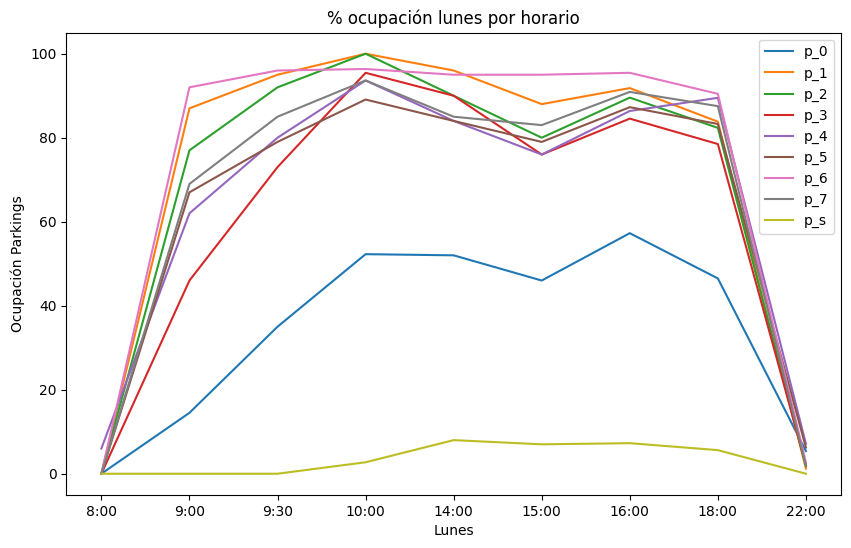

In [9]:
# Vector con los dias a graficar
horas = lunes['Horario'].drop_duplicates()

# parking 0
park_0 = lunes[["parking_0"]]

# parking 1
park_1 = lunes[["parking_1"]]

# parking 2
park_2 = lunes[["parking_2"]]

# parking 3
park_3 = lunes[["parking_3"]]

# parking 4
park_4 = lunes[["parking_4"]]

# parking 5
park_5 = lunes[["parking_5"]]

# parking 6
park_6 = lunes[["parking_6"]]

# parking 7
park_7 = lunes[["parking_7"]]

# parking subterráneo
park_sub = lunes[["parking_subterraneo"]]

# df_ocupacion_d
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(horas, park_0)
plt.title('% ocupación lunes por horario')
plt.xlabel('Lunes')
plt.ylabel('Ocupación Parkings')
plt.plot(horas, park_1)
plt.plot(horas, park_2)
plt.plot(horas, park_3)
plt.plot(horas, park_4)
plt.plot(horas, park_5)
plt.plot(horas, park_6)
plt.plot(horas, park_7)
plt.plot(horas, park_sub)

plt.legend(['p_0', 'p_1', 'p_2', 'p_3', 'p_4', 'p_5', 'p_6', 'p_7', 'p_s',],bbox_to_anchor=(1,1))

plt.savefig('% ocupación lunes.pdf', format ='pdf')
plt.show()

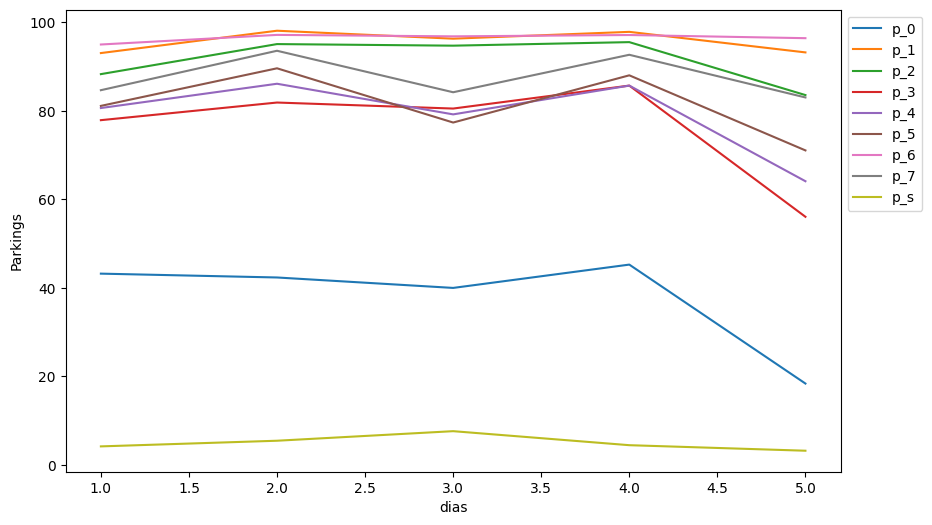

In [10]:
# Vector con los dias a graficar
dias = data['dia_num'].drop_duplicates()

dias = dias.sort_values()
# parking 0
park_0 = df_ocupacion_d[["parking_0"]]

# parking 1
park_1 = df_ocupacion_d[["parking_1"]]

# parking 2
park_2 = df_ocupacion_d[["parking_2"]]

# parking 3
park_3 = df_ocupacion_d[["parking_3"]]

# parking 4
park_4 = df_ocupacion_d[["parking_4"]]

# parking 5
park_5 = df_ocupacion_d[["parking_5"]]

# parking 6
park_6 = df_ocupacion_d[["parking_6"]]

# parking 7
park_7 = df_ocupacion_d[["parking_7"]]

# parking subterráneo
park_sub = df_ocupacion_d[["parking_subterraneo"]]

# df_ocupacion_d
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(dias, park_0)
plt.xlabel('dias')
plt.ylabel('Parkings')
plt.plot(dias, park_1)
plt.plot(dias, park_2)
plt.plot(dias, park_3)
plt.plot(dias, park_4)
plt.plot(dias, park_5)
plt.plot(dias, park_6)
plt.plot(dias, park_7)
plt.plot(dias, park_sub)

plt.legend(['p_0', 'p_1', 'p_2', 'p_3', 'p_4', 'p_5', 'p_6', 'p_7', 'p_s',],bbox_to_anchor=(1,1))

plt.show()

In [11]:
type(df_ocupacion_m_d)

pandas.core.frame.DataFrame

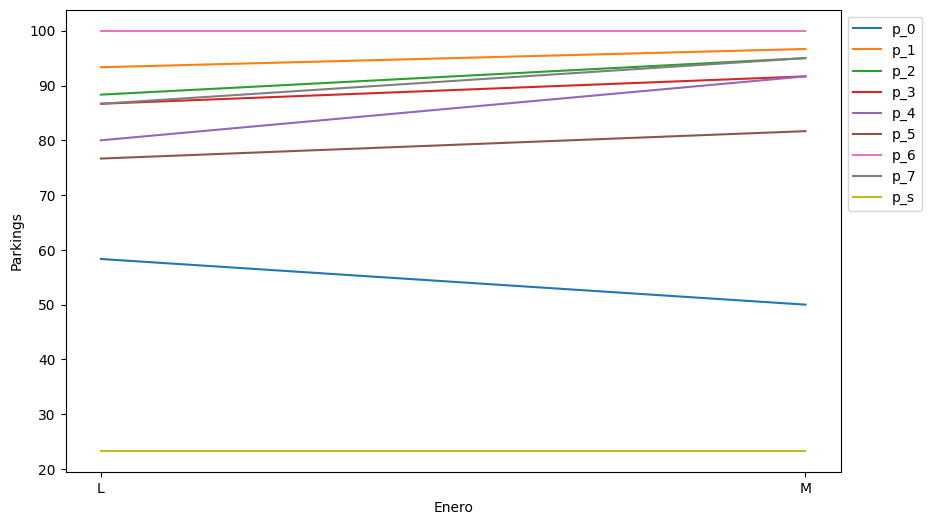

In [12]:
# Vector con los mese a graficar
enero = df_ocupacion_m_d[df_ocupacion_m_d['Mes'].apply(lambda x: '01' in x)]

dias = enero['Dia']

# parking 0
park_0 = enero[["parking_0"]]

# parking 1
park_1 = enero[["parking_1"]]

# parking 2
park_2 = enero[["parking_2"]]

# parking 3
park_3 = enero[["parking_3"]]

# parking 4
park_4 = enero[["parking_4"]]

# parking 5
park_5 = enero[["parking_5"]]

# parking 6
park_6 = enero[["parking_6"]]

# parking 7
park_7 = enero[["parking_7"]]

# parking subterráneo
park_sub = enero[["parking_subterraneo"]]

# df_ocupacion_d
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(dias, park_0)
plt.xlabel('Enero')
plt.ylabel('Parkings')
plt.plot(dias, park_1)
plt.plot(dias, park_2)
plt.plot(dias, park_3)
plt.plot(dias, park_4)
plt.plot(dias, park_5)
plt.plot(dias, park_6)
plt.plot(dias, park_7)
plt.plot(dias, park_sub)

plt.legend(['p_0', 'p_1', 'p_2', 'p_3', 'p_4', 'p_5', 'p_6', 'p_7', 'p_s',],bbox_to_anchor=(1,1))

plt.show()

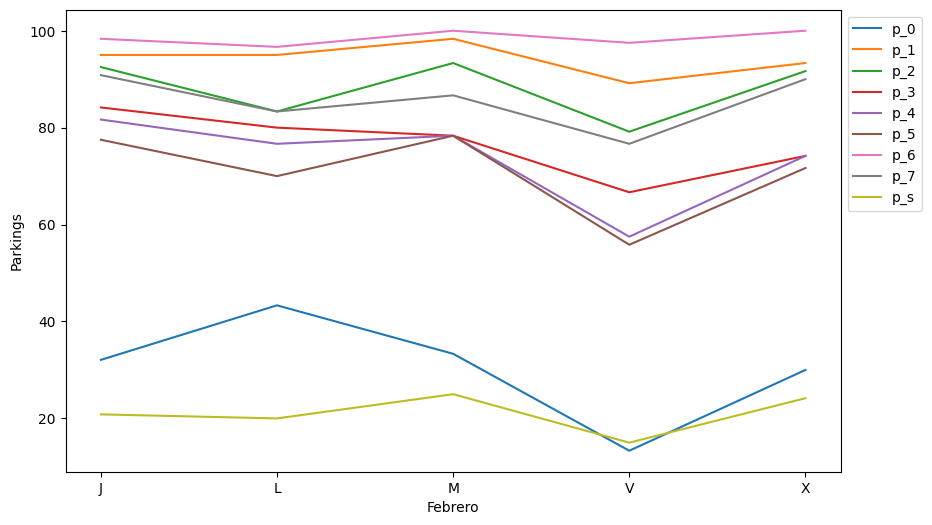

In [13]:
# Vector con los mese a graficar
febrero = df_ocupacion_m_d[df_ocupacion_m_d['Mes'].apply(lambda x: '02' in x)]

dias = febrero['Dia']

# parking 0
park_0 = febrero[["parking_0"]]

# parking 1
park_1 = febrero[["parking_1"]]

# parking 2
park_2 = febrero[["parking_2"]]

# parking 3
park_3 = febrero[["parking_3"]]

# parking 4
park_4 = febrero[["parking_4"]]

# parking 5
park_5 = febrero[["parking_5"]]

# parking 6
park_6 = febrero[["parking_6"]]

# parking 7
park_7 = febrero[["parking_7"]]

# parking subterráneo
park_sub = febrero[["parking_subterraneo"]]

# df_ocupacion_d
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(dias, park_0)
plt.xlabel('Febrero')
plt.ylabel('Parkings')
plt.plot(dias, park_1)
plt.plot(dias, park_2)
plt.plot(dias, park_3)
plt.plot(dias, park_4)
plt.plot(dias, park_5)
plt.plot(dias, park_6)
plt.plot(dias, park_7)
plt.plot(dias, park_sub)

plt.legend(['p_0', 'p_1', 'p_2', 'p_3', 'p_4', 'p_5', 'p_6', 'p_7', 'p_s',],bbox_to_anchor=(1,1))

plt.show()

In [24]:
# Numero plazas por parking

p_0 = 320
p_1 = 210
p_2 = 297
p_3 = 124
p_4 = 173 + 377
p_5 = 151 + 177
p_6 = 66
p_7 = 183 + 120

Mes                     object
Dia                     object
parking_0              float64
parking_1              float64
parking_2              float64
parking_3              float64
parking_4              float64
parking_5              float64
parking_6              float64
parking_7              float64
parking_subterraneo    float64
dia_num                float64
dtype: object

In [31]:
totall = febrero[febrero['Dia'].apply(lambda x: 'L' in x)]
totall['parking_0'] = round((totall['parking_0']*p_0)/100)
totall['parking_1'] = round((totall['parking_1']*p_1)/100)
totall['parking_2'] = round((totall['parking_2']*p_2)/100)
totall['parking_3'] = round((totall['parking_3']*p_3)/100)
totall

<ipython-input-31-eef89b300080>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totall['parking_0'] = round((totall['parking_0']*p_0)/100)
<ipython-input-31-eef89b300080>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totall['parking_1'] = round((totall['parking_1']*p_1)/100)
<ipython-input-31-eef89b300080>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,Mes,Dia,parking_0,parking_1,parking_2,parking_3,parking_4,parking_5,parking_6,parking_7,parking_subterraneo,dia_num
3,02,L,139.0,200.0,248.0,99.0,76.666667,70.0,96.666667,83.333333,20.0,1.0


In [32]:
totalm = febrero[febrero['Dia'].apply(lambda x: 'M' in x)]
totalm['parking_0'] = round((totalm['parking_0']*p_0)/100)
totalm['parking_1'] = round((totalm['parking_1']*p_1)/100)
totalm['parking_2'] = round((totalm['parking_2']*p_2)/100)
totalm['parking_3'] = round((totalm['parking_3']*p_3)/100)
totalm

<ipython-input-32-d31defadfd86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalm['parking_0'] = round((totalm['parking_0']*p_0)/100)
<ipython-input-32-d31defadfd86>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalm['parking_1'] = round((totalm['parking_1']*p_1)/100)
<ipython-input-32-d31defadfd86>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,Mes,Dia,parking_0,parking_1,parking_2,parking_3,parking_4,parking_5,parking_6,parking_7,parking_subterraneo,dia_num
4,02,M,107.0,206.0,277.0,97.0,78.333333,78.333333,100.0,86.666667,25.0,2.0


In [33]:
totalx = febrero[febrero['Dia'].apply(lambda x: 'X' in x)]
totalx['parking_0'] = round((totalx['parking_0']*p_0)/100)
totalx['parking_1'] = round((totalx['parking_1']*p_1)/100)
totalx['parking_2'] = round((totalx['parking_2']*p_2)/100)
totalx['parking_3'] = round((totalx['parking_3']*p_3)/100)
totalx

<ipython-input-33-0c86c93a6162>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalx['parking_0'] = round((totalx['parking_0']*p_0)/100)
<ipython-input-33-0c86c93a6162>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalx['parking_1'] = round((totalx['parking_1']*p_1)/100)
<ipython-input-33-0c86c93a6162>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,Mes,Dia,parking_0,parking_1,parking_2,parking_3,parking_4,parking_5,parking_6,parking_7,parking_subterraneo,dia_num
6,02,X,96.0,196.0,272.0,92.0,74.166667,71.666667,100.0,90.0,24.166667,3.0


In [34]:
totalj = febrero[febrero['Dia'].apply(lambda x: 'J' in x)]
totalj['parking_0'] = round((totalj['parking_0']*p_0)/100)
totalj['parking_1'] = round((totalj['parking_1']*p_1)/100)
totalj['parking_2'] = round((totalj['parking_2']*p_2)/100)
totalj['parking_3'] = round((totalj['parking_3']*p_3)/100)
totalj

<ipython-input-34-eb2579bf0716>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalj['parking_0'] = round((totalj['parking_0']*p_0)/100)
<ipython-input-34-eb2579bf0716>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalj['parking_1'] = round((totalj['parking_1']*p_1)/100)
<ipython-input-34-eb2579bf0716>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,Mes,Dia,parking_0,parking_1,parking_2,parking_3,parking_4,parking_5,parking_6,parking_7,parking_subterraneo,dia_num
2,02,J,103.0,200.0,275.0,104.0,81.666667,77.5,98.333333,90.833333,20.833333,4.0


In [35]:
totalv = febrero[febrero['Dia'].apply(lambda x: 'V' in x)]
totalv['parking_0'] = round((totalv['parking_0']*p_0)/100)
totalv['parking_1'] = round((totalv['parking_1']*p_1)/100)
totalv['parking_2'] = round((totalv['parking_2']*p_2)/100)
totalv['parking_3'] = round((totalv['parking_3']*p_3)/100)
totalv

<ipython-input-35-c4f826133c4b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalv['parking_0'] = round((totalv['parking_0']*p_0)/100)
<ipython-input-35-c4f826133c4b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalv['parking_1'] = round((totalv['parking_1']*p_1)/100)
<ipython-input-35-c4f826133c4b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,Mes,Dia,parking_0,parking_1,parking_2,parking_3,parking_4,parking_5,parking_6,parking_7,parking_subterraneo,dia_num
5,02,V,43.0,187.0,235.0,83.0,57.5,55.833333,97.5,76.666667,15.0,5.0
